# Flight Price Prediction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor


import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("Flight_price_prediction.csv")
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [4]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [5]:
df.drop(columns=['Unnamed: 0', 'flight'], inplace=True)


In [6]:
df.dtypes

airline              object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

In [7]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [8]:
print(df['airline'].value_counts().head())
print("------------------------------------------")
print(df['source_city'].value_counts().head())
print("------------------------------------------")
print(df['departure_time'].value_counts().head())
print("------------------------------------------")
print(df['stops'].value_counts().head())
print("------------------------------------------")
print(df['arrival_time'].value_counts().head())
print("------------------------------------------")
print(df['destination_city'].value_counts().head())
print("------------------------------------------")
print(df['class'].value_counts().head())
print("------------------------------------------")
print(df['duration'].value_counts().head())
print("------------------------------------------")
print(df['days_left'].value_counts().head())

               



airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
Name: count, dtype: int64
------------------------------------------
source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Name: count, dtype: int64
------------------------------------------
departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Name: count, dtype: int64
------------------------------------------
stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64
------------------------------------------
arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Name: count, dtype: int64
------------------------------------------
destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    4272

#  Airlines with Most Bookings

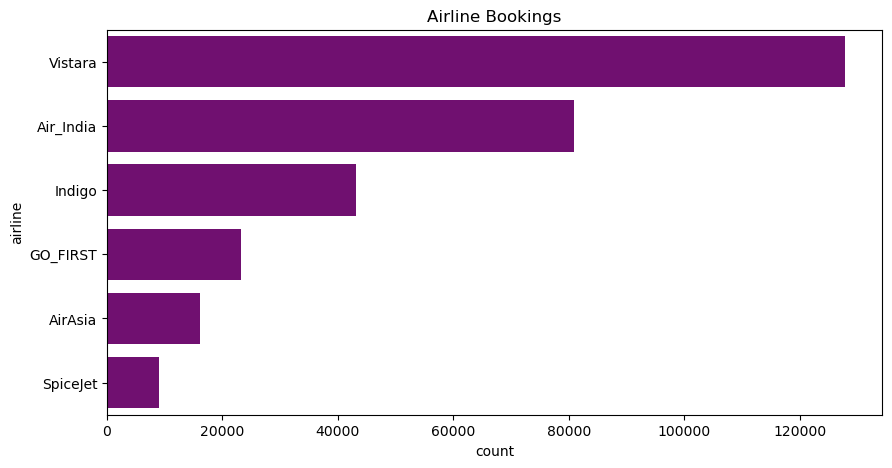

In [9]:
plt.figure(figsize=(10,5))
sns.countplot(y="airline", data=df, color='purple', order=df["airline"].value_counts().index)
plt.title("Airline Bookings")
plt.show()

In [10]:
# Distribution of Price Bookings Per Airline

# Distribution of Flight Prices

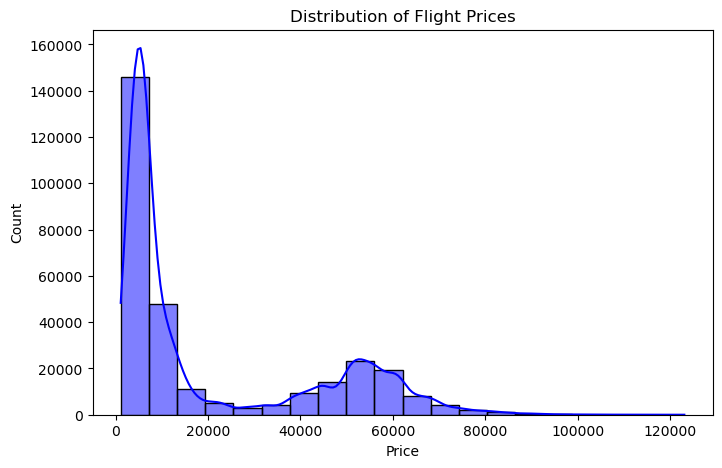

In [11]:
plt.figure(figsize=(8,5))
sns.histplot(df['price'], kde=True, color='blue', bins=20)
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.show()

# Number Of Flights by Airline

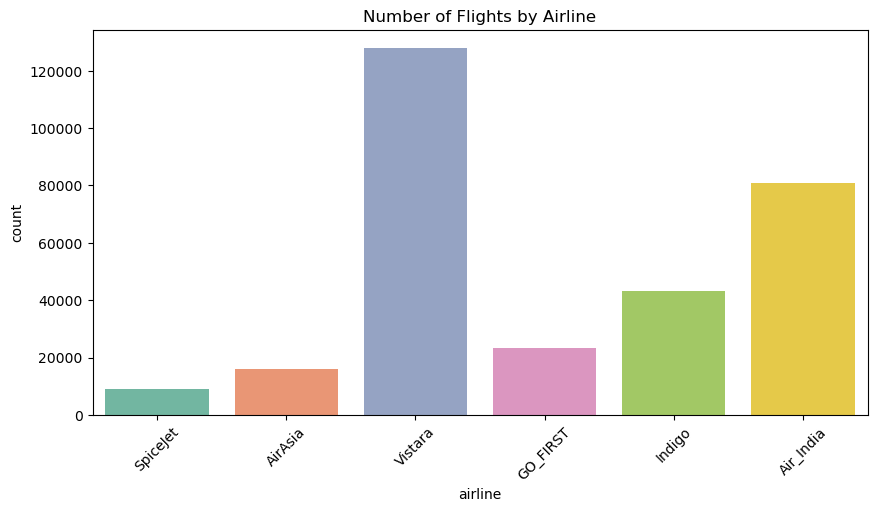

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(x='airline', data=df, palette='Set2')
plt.title('Number of Flights by Airline')
plt.xticks(rotation=45)
plt.show()

# Average Price from Different Source Airlines

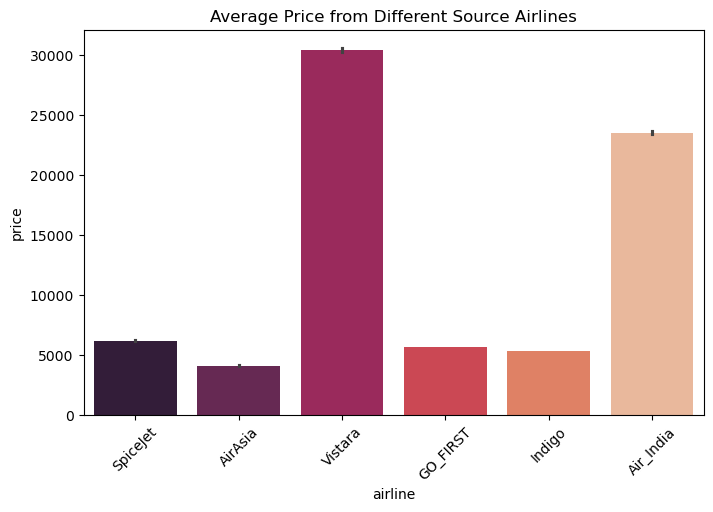

In [13]:
plt.figure(figsize=(8,5))
sns.barplot(x='airline', y='price', data=df, palette='rocket')
plt.title('Average Price from Different Source Airlines')
plt.xticks(rotation=45)
plt.show()

# Average Flight Price VS Total Stops

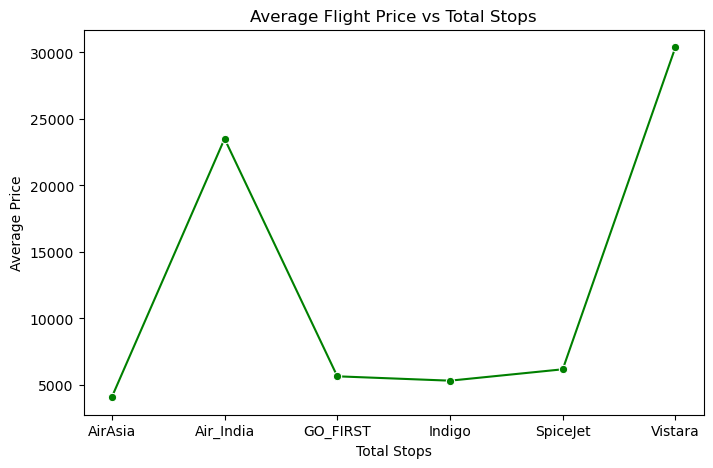

In [14]:
plt.figure(figsize=(8,5))
avg_price_per_stop = df.groupby('airline')['price'].mean().reset_index()

sns.lineplot(x='airline', y='price', data=avg_price_per_stop, marker='o', color='green')
plt.title('Average Flight Price vs Total Stops')
plt.xlabel('Total Stops')
plt.ylabel('Average Price')
plt.show()

# Correlation Between Numeric Columns

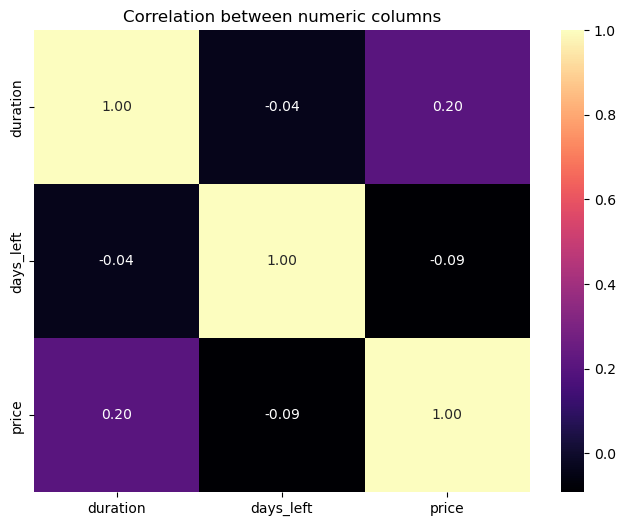

In [15]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='magma', fmt=".2f")
plt.title("Correlation between numeric columns")
plt.show()


In [16]:
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


# Price vs Airline

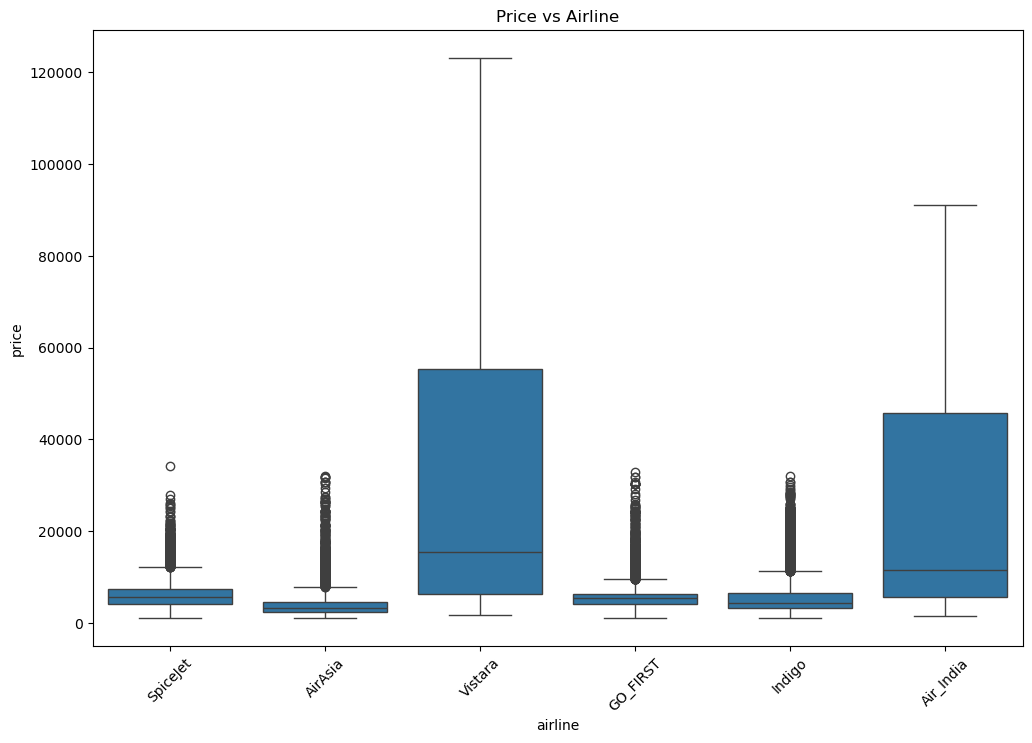

In [17]:
plt.figure(figsize=(12,8))
sns.boxplot(x='airline', y='price', data=df)
plt.title(f'Price vs Airline')
plt.xticks(rotation=45)
plt.show()

# Average Flight Price VS Days Left

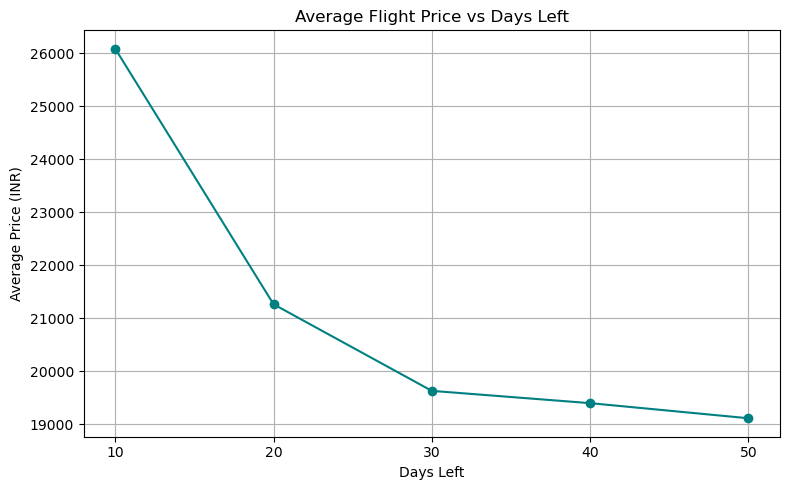

In [18]:
import matplotlib.pyplot as plt

# Data
days_left = [10, 20, 30, 40, 50]
avg_price = [26082.75, 21260.48, 19625.79, 19393.77, 19108.74]

# Plotting the line chart
plt.figure(figsize=(8, 5))
plt.plot(days_left, avg_price, marker='o', linestyle='-', color='teal')
plt.title('Average Flight Price vs Days Left')
plt.xlabel('Days Left')
plt.ylabel('Average Price (INR)')
plt.grid(True)
plt.xticks(days_left)
plt.tight_layout()
plt.show()

# Label Encoding

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
LE=LabelEncoder()

In [21]:
df_categorical=df.select_dtypes("object")
df_categorical

,airline,source_city,departure_time,stops,arrival_time,destination_city,class
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy
...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business


In [22]:
for i in df_categorical:
    df_categorical[i]=LE.fit_transform(df_categorical[i])
df_categorical

,airline,source_city,departure_time,stops,arrival_time,destination_city,class
0,4,2,2,2,5,5,1
1,4,2,1,2,4,5,1
2,0,2,1,2,1,5,1
3,5,2,4,2,0,5,1
4,5,2,4,2,4,5,1
...,...,...,...,...,...,...,...
300148,5,1,4,0,2,3,0
300149,5,1,0,0,5,3,0
300150,5,1,1,0,5,3,0
300151,5,1,1,0,2,3,0


In [23]:
df_Numerical=df.select_dtypes(["int64","float64"])
df_Numerical.drop(["price"],axis=1,inplace=True)
df_Numerical       

,duration,days_left
0,2.17,1
1,2.33,1
2,2.17,1
3,2.25,1
4,2.33,1
...,...,...
300148,10.08,49
300149,10.42,49
300150,13.83,49
300151,10.00,49


# Standard Scaler

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
SS=StandardScaler()

In [26]:
scaled_numerical_array=SS.fit_transform(df_Numerical)
scaled_numerical_array

array([[-1.39753079, -1.84387477],
       [-1.3752838 , -1.84387477],
       [-1.39753079, -1.84387477],
       ...,
       [ 0.22371837,  1.69569214],
       [-0.30881888,  1.69569214],
       [-0.29769538,  1.69569214]])

In [27]:
df_Numerical.columns

Index(['duration', 'days_left'], dtype='object')

In [28]:
scaled_numerical_df=pd.DataFrame(scaled_numerical_array,columns=df_Numerical.columns)
scaled_numerical_df

,duration,days_left
0,-1.397531,-1.843875
1,-1.375284,-1.843875
2,-1.397531,-1.843875
3,-1.386407,-1.843875
4,-1.375284,-1.843875
...,...,...
300148,-0.297695,1.695692
300149,-0.250421,1.695692
300150,0.223718,1.695692
300151,-0.308819,1.695692


In [29]:
df2=pd.concat((scaled_numerical_df,df_categorical),axis=1)
df2.reset_index()

,index,duration,days_left,airline,source_city,departure_time,stops,arrival_time,destination_city,class
0,0,-1.397531,-1.843875,4,2,2,2,5,5,1
1,1,-1.375284,-1.843875,4,2,1,2,4,5,1
2,2,-1.397531,-1.843875,0,2,1,2,1,5,1
3,3,-1.386407,-1.843875,5,2,4,2,0,5,1
4,4,-1.375284,-1.843875,5,2,4,2,4,5,1
...,...,...,...,...,...,...,...,...,...,...
300148,300148,-0.297695,1.695692,5,1,4,0,2,3,0
300149,300149,-0.250421,1.695692,5,1,0,0,5,3,0
300150,300150,0.223718,1.695692,5,1,1,0,5,3,0
300151,300151,-0.308819,1.695692,5,1,1,0,2,3,0


In [30]:
df2.corr()

,duration,days_left,airline,source_city,departure_time,stops,arrival_time,destination_city,class
duration,1.000000,-0.039157,-0.001651,0.008619,0.084348,-0.473860,0.008679,0.001736,-0.138710
days_left,-0.039157,1.000000,-0.010678,-0.003568,-0.001597,-0.007047,-0.004191,-0.005323,0.013039
airline,-0.001651,-0.010678,1.000000,-0.028350,0.056885,-0.029838,0.037714,-0.030172,-0.178862
source_city,0.008619,-0.003568,-0.028350,1.000000,-0.004688,0.001819,0.044153,-0.222935,0.000075
departure_time,0.084348,-0.001597,0.056885,-0.004688,1.000000,-0.008518,-0.046282,-0.001761,-0.053340
stops,-0.473860,-0.007047,-0.029838,0.001819,-0.008518,1.000000,0.010515,-0.012846,0.100262
arrival_time,0.008679,-0.004191,0.037714,0.044153,-0.046282,0.010515,1.000000,-0.037431,-0.027647
destination_city,0.001736,-0.005323,-0.030172,-0.222935,-0.001761,-0.012846,-0.037431,1.000000,0.001603
class,-0.138710,0.013039,-0.178862,0.000075,-0.053340,0.100262,-0.027647,0.001603,1.000000


In [31]:
df2.shape

(300153, 9)

# skewness Removal

In [32]:
from scipy.stats import skew

In [33]:
df2.select_dtypes(["int64"
                   ,"float64"]).columns

Index(['duration', 'days_left', 'airline', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class'],
      dtype='object')

In [34]:
for i in df2.select_dtypes(["int64","float64"]).columns:
    print(f"Skewness of {i} is {round(df2[i].skew(),2)}\n")
    

Skewness of duration is 0.6

Skewness of days_left is -0.04

Skewness of airline is -0.21

Skewness of source_city is -0.03

Skewness of departure_time is 0.15

Skewness of stops is 2.04

Skewness of arrival_time is -0.4

Skewness of destination_city is -0.05

Skewness of class is -0.81



Skewness of duration is 0.6



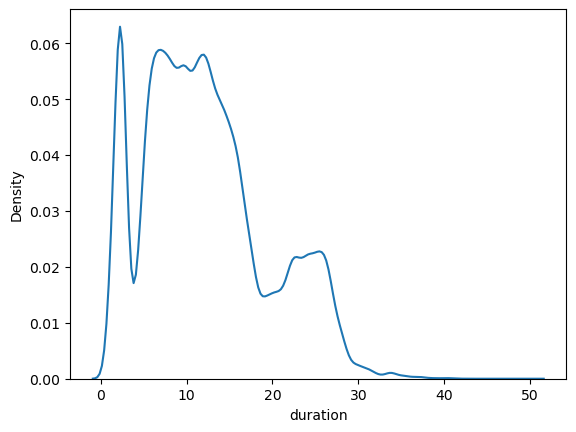

Skewness of days_left is -0.04



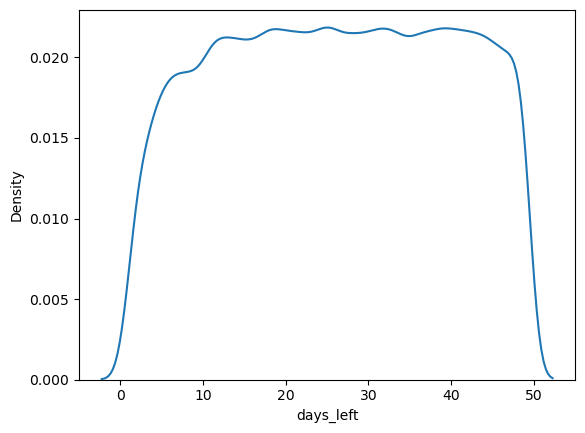

Skewness of price is 1.06



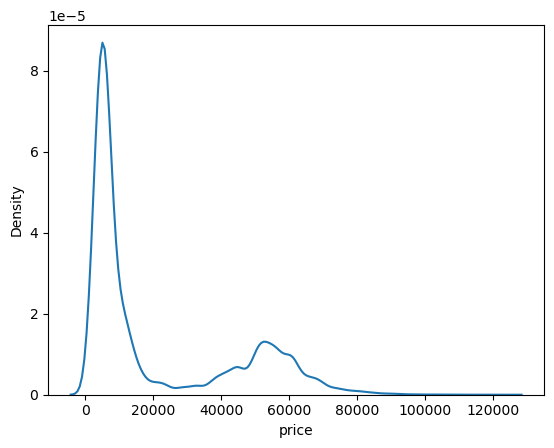

In [35]:
for i in df.select_dtypes(["int64","float64"]).columns:
    print(f"Skewness of {i} is {round(df[i].skew(),2)}\n")
    sns.kdeplot(df[i])
    plt.show()

In [36]:
df_num = df.select_dtypes(["int64", "float64"])
df_num

,duration,days_left,price
0,2.17,1,5953
1,2.33,1,5953
2,2.17,1,5956
3,2.25,1,5955
4,2.33,1,5955
...,...,...,...
300148,10.08,49,69265
300149,10.42,49,77105
300150,13.83,49,79099
300151,10.00,49,81585


In [37]:
df_categorical

,airline,source_city,departure_time,stops,arrival_time,destination_city,class
0,4,2,2,2,5,5,1
1,4,2,1,2,4,5,1
2,0,2,1,2,1,5,1
3,5,2,4,2,0,5,1
4,5,2,4,2,4,5,1
...,...,...,...,...,...,...,...
300148,5,1,4,0,2,3,0
300149,5,1,0,0,5,3,0
300150,5,1,1,0,5,3,0
300151,5,1,1,0,2,3,0


In [38]:
df3=pd.concat([df_categorical,df_num], axis=1)
df3

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,2,2,2,5,5,1,2.17,1,5953
1,4,2,1,2,4,5,1,2.33,1,5953
2,0,2,1,2,1,5,1,2.17,1,5956
3,5,2,4,2,0,5,1,2.25,1,5955
4,5,2,4,2,4,5,1,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,5,1,4,0,2,3,0,10.08,49,69265
300149,5,1,0,0,5,3,0,10.42,49,77105
300150,5,1,1,0,5,3,0,13.83,49,79099
300151,5,1,1,0,2,3,0,10.00,49,81585


In [39]:
df3.isnull().sum()

airline             0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [40]:
x=df3.drop('price',axis=1)
y=df3['price']

In [41]:
x

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,4,2,2,2,5,5,1,2.17,1
1,4,2,1,2,4,5,1,2.33,1
2,0,2,1,2,1,5,1,2.17,1
3,5,2,4,2,0,5,1,2.25,1
4,5,2,4,2,4,5,1,2.33,1
...,...,...,...,...,...,...,...,...,...
300148,5,1,4,0,2,3,0,10.08,49
300149,5,1,0,0,5,3,0,10.42,49
300150,5,1,1,0,5,3,0,13.83,49
300151,5,1,1,0,2,3,0,10.00,49


In [42]:
y

0          5953
1          5953
2          5956
3          5955
4          5955
          ...  
300148    69265
300149    77105
300150    79099
300151    81585
300152    81585
Name: price, Length: 300153, dtype: int64

In [43]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.20, random_state=42)

In [44]:
from sklearn.linear_model import LinearRegression, SGDRegressor

In [45]:
LR=LinearRegression()


In [46]:
LR.fit(xtrain,ytrain)

LinearRegression()

In [47]:
ypred=LR.predict(xtest)


Training_Acc= round(LR.score(xtrain,ytrain),2)*100
Testing_ACC=round(LR.score(xtest,ytest),2)*100
print(f"Training Accuracy of Linear Regresion is {Training_Acc}% ")
print(f"Training Accuracy of Linear Regresion is {Testing_ACC}% ")

Training Accuracy of Linear Regresion is 90.0% 
Training Accuracy of Linear Regresion is 90.0% 


In [48]:
from sklearn.tree import DecisionTreeRegressor

# Train
dt_reg = DecisionTreeRegressor(max_depth=5, min_samples_split=3,min_samples_leaf=2) #max_depth=5, min_samples_split=3,min_samples_leaf=2
dt_reg.fit(xtrain, ytrain)

# Predict
y_pred_dt = dt_reg.predict(xtest)

Training_Acc= round(dt_reg.score(xtrain,ytrain),2)*100
Testing_acc= round(dt_reg.score(xtest,ytest),2)*100
print(f"Training Accuracy of Decision Tree Regressor is {Training_Acc}% ")
print(f"Testing Accuracy of Decision Tree Regressor is {Testing_acc}% ")


Training Accuracy of Decision Tree Regressor is 94.0% 
Testing Accuracy of Decision Tree Regressor is 94.0% 


In [49]:
from sklearn.ensemble import RandomForestRegressor
# Train Random Forest
RF = RandomForestRegressor(n_estimators=100,random_state=42)
RF.fit(xtrain, ytrain)

# Predict
y_pred_RF = RF.predict(xtest)

# Evaluate
Training_Acc= round(RF.score(xtrain,ytrain),2)*100
Testing_acc=round(RF.score(xtest,ytest),2)*100
print(f"Training Accuracy of Random Forest Regressor is {Training_Acc}% ")
print(f"Testing Accuracy of Random Forest Regressor is {Testing_acc}% ")

Training Accuracy of Random Forest Regressor is 100.0% 
Testing Accuracy of Random Forest Regressor is 98.0% 


In [50]:
from sklearn.neighbors import KNeighborsRegressor

# Train KNN
KNN = KNeighborsRegressor(n_neighbors=5, weights='uniform')
KNN.fit(xtrain, ytrain)

# Predict
y_pred_KNN = KNN.predict(xtest)

# Evaluate
Training_Acc= round(KNN.score(xtrain,ytrain),2)*100
Testing_acc=round(KNN.score(xtest,ytest),2)*100
print(f"Training Accuracy of KNeighborsRegressor is {Training_Acc}% ")
print(f"Testing Accuracy of KNeighborsRegressor is {Testing_acc}% ")


Training Accuracy of KNeighborsRegressor is 82.0% 
Testing Accuracy of KNeighborsRegressor is 71.0% 


In [51]:
from sklearn.ensemble import GradientBoostingRegressor

GB = GradientBoostingRegressor()
GB.fit(xtrain, ytrain)
y_pred_gbr = GB.predict( xtest)

Training_Acc= round(GB.score(xtrain,ytrain),2)*100
Testing_acc=round(GB.score(xtest,ytest),2)*100
print(f"Training Accuracy of GradientBoostingRegressor is {Training_Acc}% ")
print(f"Testing Accuracy of GradientBoostingRegressor is {Testing_acc}% ")

Training Accuracy of GradientBoostingRegressor is 95.0% 
Testing Accuracy of GradientBoostingRegressor is 95.0% 


In [52]:
from xgboost import XGBRegressor

xgb=XGBRegressor()
xgb.fit(xtrain,ytrain)
ypred=xgb.predict(xtest)

Training_Acc= round(xgb.score(xtrain,ytrain),2)*100
Testing_acc=round(xgb.score(xtest,ytest),2)*100
print(f"Training Accuracy of XGBRegressor is {Training_Acc}% ")
print(f"Testing Accuracy of XGBRegressor is {Testing_acc}% ")

Training Accuracy of XGBRegressor is 98.0% 
Testing Accuracy of XGBRegressor is 98.0% 


In [53]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVR

# # Step 1: Define parameter grid
# param_grid = {
#     'C': [0.1, 1, 10],
#     'gamma': [0.001, 0.01, 0.1],
#     'kernel': ['rbf', 'linear']
# }

# # Step 2: Define model
# model = SVR()

# # Step 3: Grid Search with 5-fold cross-validation
# grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# # Step 4: Fit on training data
# grid.fit(xtrain, ytrain)

# # Step 5: Best parameters and accuracy
# print("Best Parameters:", grid.best_params_)
# print("Best Score:", grid.best_score_)


In [54]:
# from sklearn.svm import SVR

# svr_reg = SVR(C=100,gamma=10)
# svr_reg.fit(xtrain, ytrain)
# y_pred_svr = svr_reg.predict(xtest)

# Training_Acc= round(svr_reg.score(xtrain,ytrain),2)*100
# Testing_acc=round(svr_reg.score(xtest,ytest),2)*100
# print(f"Training Accuracy of SVR is {Training_Acc}% ")
# print(f"Testing Accuracy of SVR is {Testing_acc}% ")


 Final Accuracy Comparison (High to Low):
------------------------------------
Random Forest: 98.00%
ExtremeGradient: 98.00%
GradientBoosting: 95.00%
Decision Tree: 94.00%
Linear Regression: 90.00%
KNN: 71.00%
--------------------------------------


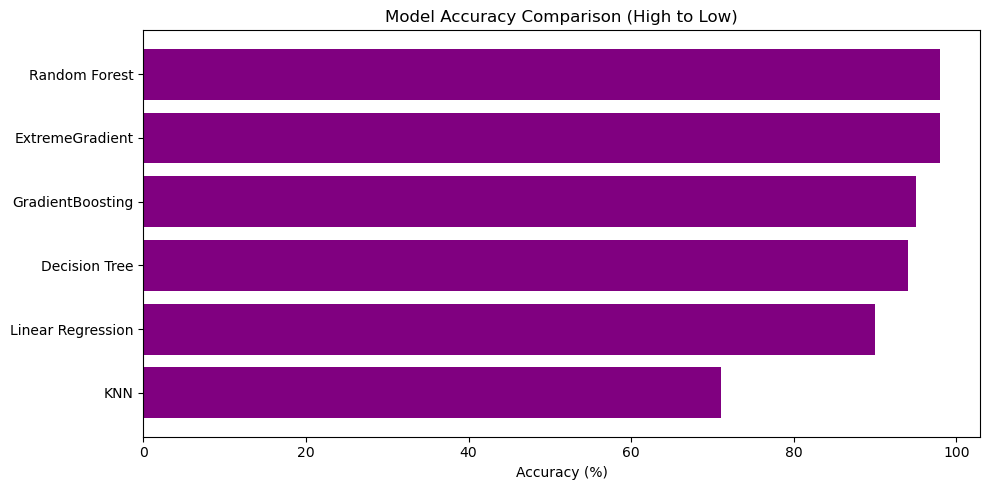

In [55]:
import matplotlib.pyplot as plt

# Your model accuracy dictionary
results = {
    'Linear Regression': round(LR.score(xtest, ytest), 2) * 100,
    'Decision Tree': round(dt_reg.score(xtest, ytest), 2) * 100,
    'Random Forest': round(RF.score(xtest, ytest), 2) * 100,
    'KNN': round(KNN.score(xtest, ytest), 2) * 100,
    'GradientBoosting': round(GB.score(xtest, ytest), 2) * 100,
    'ExtremeGradient': round(xgb.score(xtest, ytest), 2) * 100
}

#  Sort the results by accuracy descending
sorted_results = dict(sorted(results.items(), key=lambda item: item[1], reverse=True))

# ✅ Print sorted accuracies
print("\n Final Accuracy Comparison (High to Low):")
print("------------------------------------")
for model, acc in sorted_results.items():
    print(f"{model}: {acc:.2f}%")
print("--------------------------------------")

# Horizontal Bar Chart (Sorted)
plt.figure(figsize=(10,5))
plt.barh(list(sorted_results.keys()), list(sorted_results.values()), color='purple')
plt.xlabel('Accuracy (%)')
plt.title('Model Accuracy Comparison (High to Low)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [56]:
from sklearn.ensemble import RandomForestRegressor
# Train Random Forest
RF = RandomForestRegressor(n_estimators=100,random_state=42)
RF.fit(xtrain, ytrain)

# Predict
y_pred_RF = RF.predict(xtest)

# Evaluate
Training_Acc= round(RF.score(xtrain,ytrain),2)*100
Testing_acc=round(RF.score(xtest,ytest),2)*100
print(f"Training Accuracy of Random Forest Regressor is {Training_Acc}% ")
print(f"Testing Accuracy of Random Forest Regressor is {Testing_acc}% ")

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = r2_score(ytest, y_pred_RF)
mae = mean_absolute_error(ytest, y_pred_RF)
rmse = np.sqrt(mean_squared_error(ytest, y_pred_RF))


print("Random forest Results:")
print("R2 Score:", round(r2, 4))
print("MAE:", round(mae, 2))
print("RMSE:", round(rmse, 2))

Training Accuracy of Random Forest Regressor is 100.0% 
Testing Accuracy of Random Forest Regressor is 98.0% 
Random forest Results:
R2 Score: 0.9849
MAE: 1091.44
RMSE: 2786.5


In [57]:
import joblib
joblib.dump(RF, "Flight_Price_prediction_RF.pkl")

['Flight_Price_prediction_RF.pkl']

In [59]:
import pandas as pd
import joblib

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# ================= LOAD DATA =================
df = pd.read_csv("Flight_price_prediction.csv")   # <-- your dataset

# ================= CLEAN DATA =================
# Drop unwanted columns if present
df = df.drop(columns=['Unnamed: 0', 'flight'], errors='ignore')

# Convert duration if it is string like "2h 30m"
# (skip this if already numeric)
# df['duration'] = ...

# ================= FEATURES & TARGET =================
X = df.drop('price', axis=1)
y = df['price']

# ================= COLUMN TYPES =================
categorical_features = [
    'airline',
    'source_city',
    'destination_city',
    'stops',
    'departure_time',
    'arrival_time',
    'class'
]

numerical_features = [
    'duration',
    'days_left'
]

# ================= PREPROCESSOR =================
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', 'passthrough', numerical_features)
    ]
)

# ================= MODEL =================
rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

# ================= PIPELINE =================
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', rf)
])

# ================= TRAIN TEST SPLIT =================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ================= TRAIN =================
pipeline.fit(X_train, y_train)

# ================= EVALUATION =================
y_pred = pipeline.predict(X_test)

print("R2 Score:", round(r2_score(y_test, y_pred), 4))
print("MAE:", round(mean_absolute_error(y_test, y_pred), 2))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred)), 2))

# ================= SAVE PIPELINE =================
joblib.dump(pipeline, "Flight_Price_Pipeline.pkl")

print("✅ Pipeline trained and saved successfully")


R2 Score: 0.9849
MAE: 1077.43
RMSE: 2787.28
✅ Pipeline trained and saved successfully
